In [46]:
# import libraries 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-fashion-dataset/FashionDataset.csv


**information about data**

This dataset is a collection of 30000 women fashion products. Categories covered in this dataset is western wear, Indian wear, perfumes and fragrances, watches and nightwear.

**Column description is mentioned below:**

*BrandName: Mentions the brand of the product

*Details: Deatils about the product

*Size: Sizes available

*MRP: This is max retail price

*SellPrice: This is the price after discount

*Category: Category of the product.

**Reading data**

In [47]:
df=pd.read_csv('/kaggle/input/ecommerce-fashion-dataset/FashionDataset.csv')
df.head()


,Unnamed: 0,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women


**Explore data**

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30758 entries, 0 to 30757
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30758 non-null  int64 
 1   BrandName   30758 non-null  object
 2   Deatils     30758 non-null  object
 3   Sizes       30758 non-null  object
 4   MRP         30758 non-null  object
 5   SellPrice   30758 non-null  object
 6   Discount    30758 non-null  object
 7   Category    30758 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.9+ MB


In [49]:
#check null values
df.isnull().sum()

Unnamed: 0    0
BrandName     0
Deatils       0
Sizes         0
MRP           0
SellPrice     0
Discount      0
Category      0
dtype: int64

In [50]:
df.describe(include='object')

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
count,30758,30758,30758,30758,30758,30758,30758
unique,275,23877,1172,1097,2046,66,7
top,vastranand,Nan,Nan,Nan,Nan,Nan,Westernwear-Women
freq,1543,1183,7501,8208,1183,8208,10374


**data preprocessing**

In [51]:
df.nunique()

Unnamed: 0       26
BrandName       275
Deatils       23877
Sizes          1172
MRP            1097
SellPrice      2046
Discount         66
Category          7
dtype: int64

* convert SellPrice into int 
*also convert MRP to int 
*delete unnamed culumn

In [52]:
df.dropna(axis=0,inplace=True)

In [53]:
#drop unnamed column
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women


In [54]:
df.replace('Nan',np.nan,inplace=True)

In [55]:
df.dropna(axis=0,inplace=True)

In [56]:
#convert SellPrice and MRP into int
df['MRP']=df['MRP'].str.replace('Rs\n','')
df['MRP']=df['MRP'].astype(int)
df['SellPrice']=df['SellPrice'].astype(int)

In [57]:
df.head()


,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",1699,849,50% off,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",3499,2449,30% off,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",1199,599,50% off,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",2299,1379,40% off,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",1699,849,50% off,Westernwear-Women


**what we can explore in this dataset?**

* how many categories on dataset?

* top ten brands .

* high and low sell price .

* top costly brands.

* prands have minimum and max discount.



**which category has maximum options of women’s wear?**

In [58]:
max_category=df['Category'].value_counts()
max_category

Category
Westernwear-Women           8221
Indianwear-Women            6428
Lingerie&Nightwear-Women    2084
Footwear-Women              1638
Watches-Women                  3
Name: count, dtype: int64

* we can visualize these results to more illustrate 

<Axes: xlabel='Category', ylabel='count'>

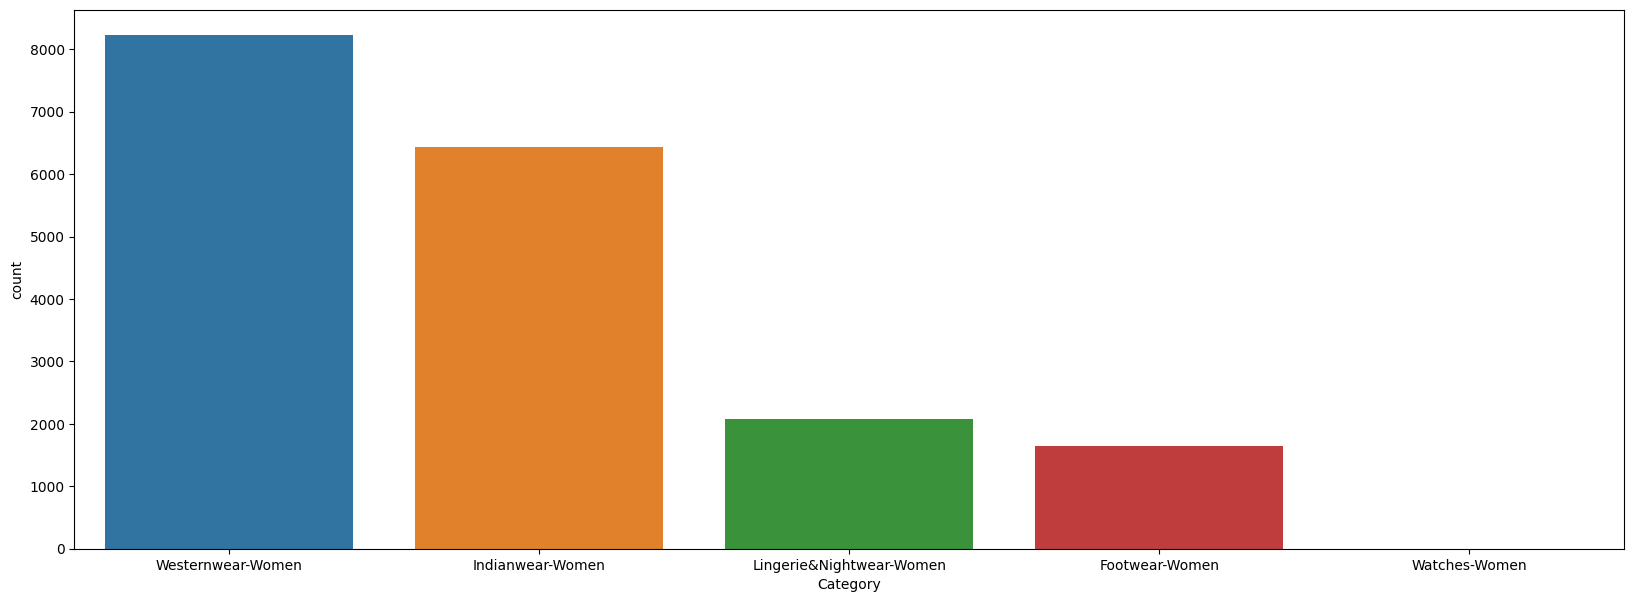

In [59]:
plt.figure(figsize=(20,7))
sns.countplot(x=df['Category'])

* the most two categories are **Westernwear-Women** 
and **Indianwear-Women**  

**Discount**

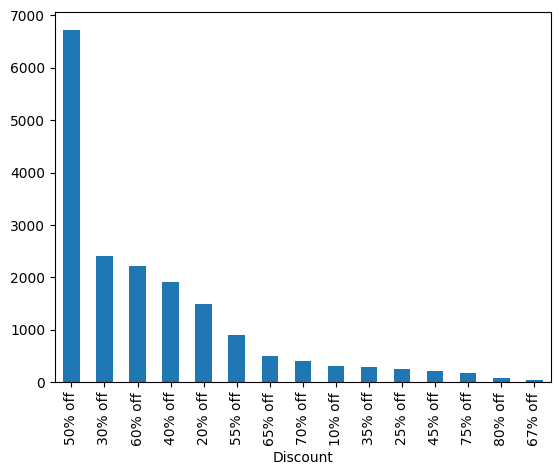

In [60]:
most_off=df['Discount'].value_counts().head(15).plot(kind='bar')

In [61]:
df.columns

Index(['BrandName', 'Deatils', 'Sizes', 'MRP', 'SellPrice', 'Discount',
       'Category'],
      dtype='object')

**brands have max and min discount**

In [62]:
#brands have max discount
max_disc=df[['BrandName','Discount','Category']].sort_values(by='Discount'
                                                           , ascending=False).head(15)

max_disc.style.background_gradient(cmap='coolwarm')

,BrandName,Discount,Category
11602,myshka,85% off,Indianwear-Women
11523,myshka,85% off,Indianwear-Women
10845,myshka,85% off,Indianwear-Women
11197,myshka,85% off,Indianwear-Women
10409,myshka,85% off,Indianwear-Women
11763,myshka,85% off,Indianwear-Women
10657,myshka,85% off,Indianwear-Women
11628,myshka,85% off,Indianwear-Women
10511,myshka,85% off,Indianwear-Women
1677,lovegen,80% off,Westernwear-Women


* brand myshka in indianwear women has the most discount reach to 85% !
* it is followed in the second place brand 'zink london' in western women reach to 80% 

In [94]:
min_disc=df.groupby(['BrandName','Category'])['Discount'] .min().reset_index().sort_values(by='Discount', ascending=True).head(15)

min_disc.style.background_gradient(cmap='coolwarm')

#min_price=df.groupby(['BrandName','Category'])['SellPrice'].min().reset_index().sort_values(by='SellPrice',ascending=True).head(10)
#min_price

,BrandName,Category,Discount
120,shoetopia,Footwear-Women,0% off
94,myshka,Indianwear-Women,10% off
123,soie,Lingerie&Nightwear-Women,10% off
40,fusion beats,Indianwear-Women,10% off
131,sweet dreams,Lingerie&Nightwear-Women,10% off
132,sweet dreams,Westernwear-Women,10% off
6,amante,Lingerie&Nightwear-Women,10% off
117,samshek,Westernwear-Women,10% off
23,crimsoune club,Westernwear-Women,10% off
9,and,Westernwear-Women,10% off


* brand shoetopia in footwear_women has no discunt !

* it is followed in the second place brand myshka in indean wear ha 10% off .

**sizes**

<Axes: xlabel='Sizes'>

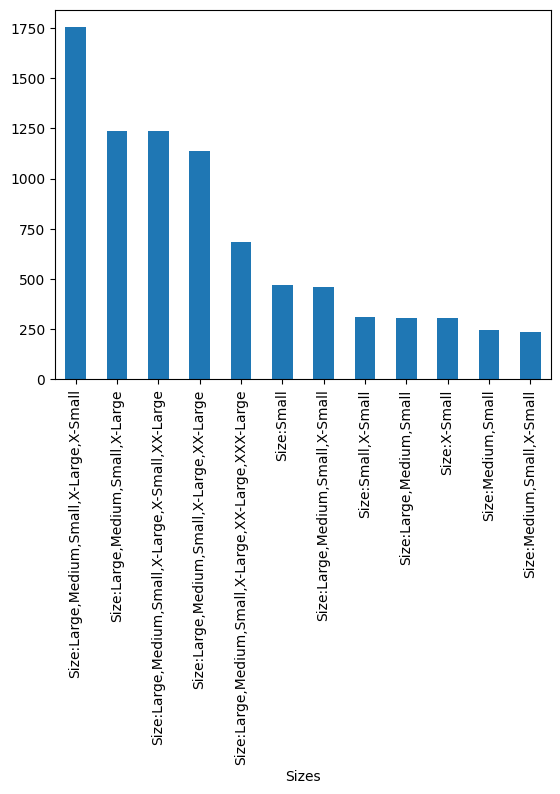

In [71]:
plt.xticks(rotation=45)
df['Sizes'].value_counts().head(12).plot(kind='bar')

**high sell price**

In [73]:
high_price=df[['BrandName','SellPrice','Category']].sort_values(by='SellPrice'
                                                                ,ascending=False).head(10)
high_price.style.background_gradient(cmap='coolwarm')


,BrandName,SellPrice,Category
15744,global desi,13599,Indianwear-Women
14154,global desi,12799,Indianwear-Women
18629,w,7499,Indianwear-Women
24281,new balance,6999,Footwear-Women
24641,new balance,6999,Footwear-Women
25635,new balance,6999,Footwear-Women
24742,new balance,6999,Footwear-Women
14053,w,6749,Indianwear-Women
16718,w,6749,Indianwear-Women
15053,w,6749,Indianwear-Women


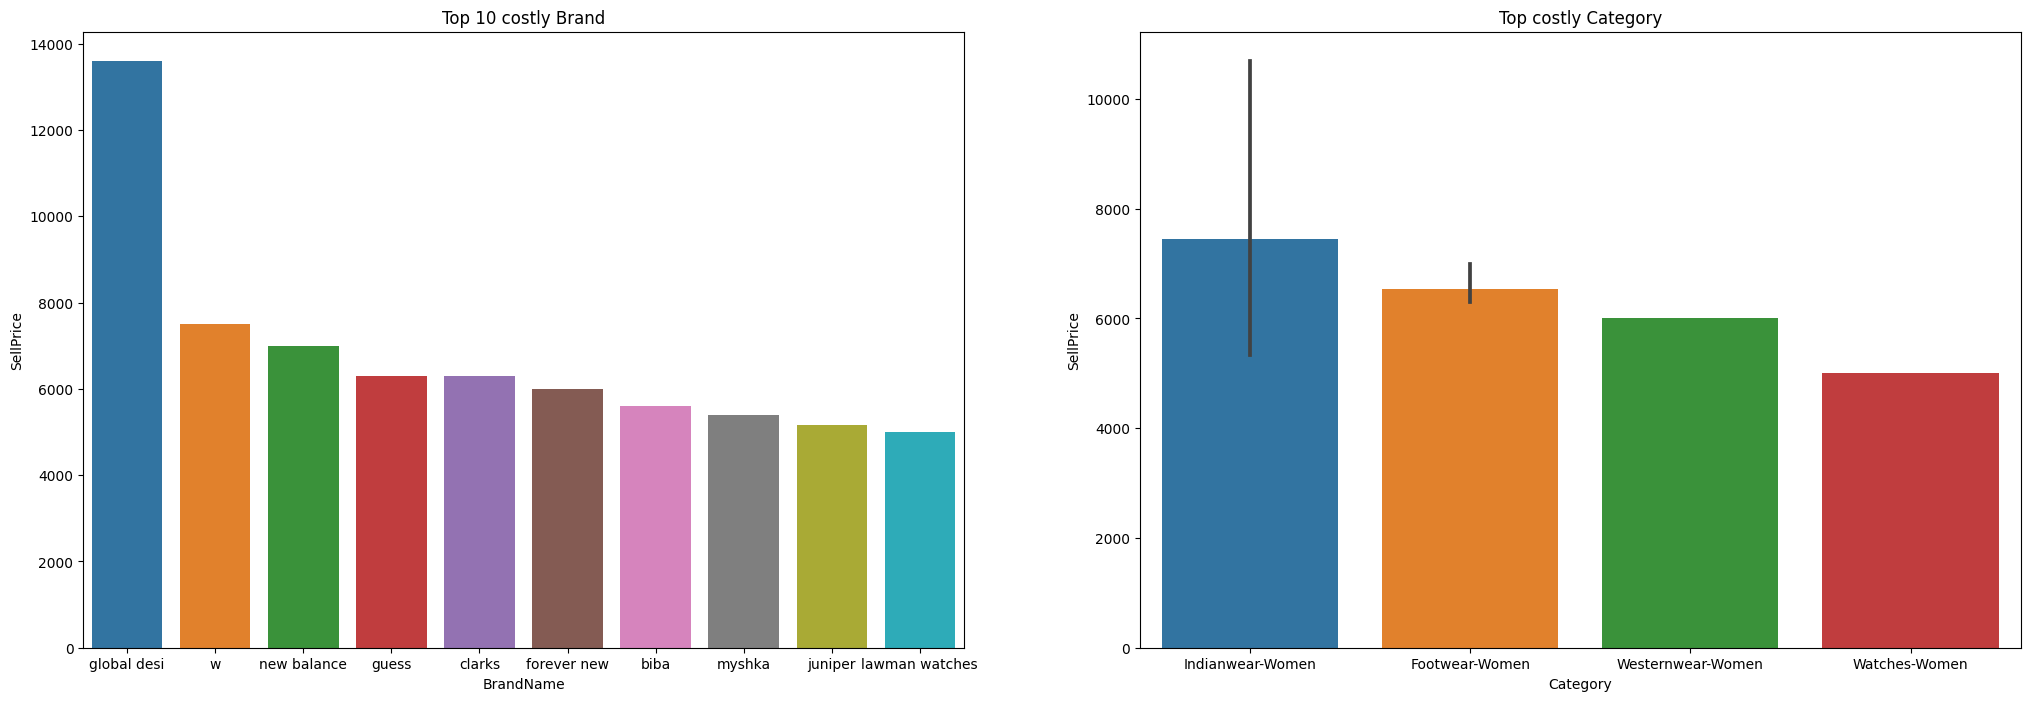

In [74]:
max_price=df.groupby(['BrandName','Category'])['SellPrice'].max().reset_index().sort_values(by='SellPrice',ascending=False).head(10)
plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
plt.title('Top 10 costly Brand')
sns.barplot(x='BrandName' , y='SellPrice' ,data=max_price)

plt.subplot(1,2,2)
plt.title('Top costly Category')
sns.barplot(x='Category' , y='SellPrice' ,data=max_price)
plt.show()

**from graph we deduce that ;**

*most cost brand is glubi desi

*most cost category is indian wear 

**top cheap sellprice**

In [83]:
min_price=df.groupby(['BrandName','Category'])['SellPrice'].min().reset_index().sort_values(by='SellPrice',ascending=True).head(15)
min_price.style.background_gradient(cmap='coolwarm')

,BrandName,Category,SellPrice
19,clovia,Lingerie&Nightwear-Women,114
58,insense,Lingerie&Nightwear-Women,119
100,nayomi,Lingerie&Nightwear-Women,149
29,enamor,Lingerie&Nightwear-Women,150
123,soie,Lingerie&Nightwear-Women,192
148,wacoal,Lingerie&Nightwear-Women,197
57,infuse,Westernwear-Women,199
5,altlife,Westernwear-Women,199
56,infuse,Lingerie&Nightwear-Women,199
59,insense,Westernwear-Women,199


<Axes: title={'center': 'top 10 cheap brand'}, xlabel='BrandName', ylabel='SellPrice'>

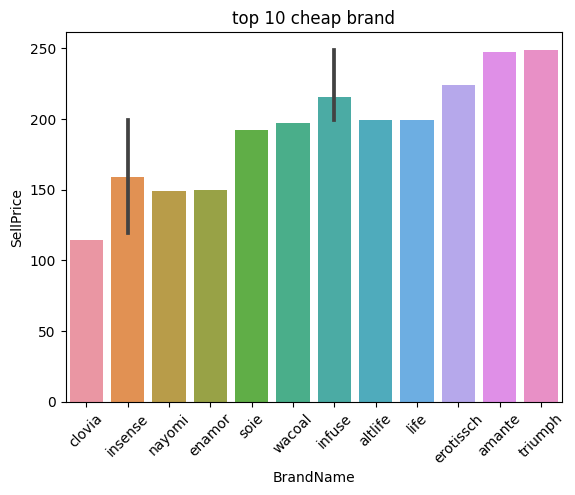

In [88]:
plt.title('top 10 cheap brand')
plt.xticks(rotation=45)
sns.barplot(x='BrandName' , y='SellPrice' ,data=min_price)

**top chaep category**

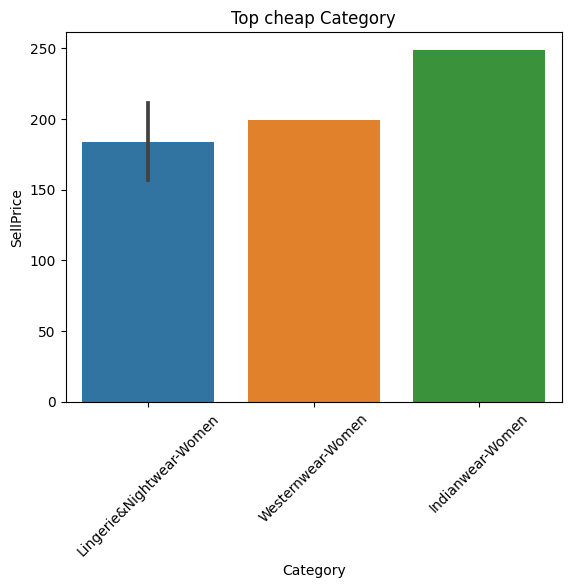

In [89]:
#top cheap category
plt.title('Top cheap Category')
plt.xticks(rotation=45)
sns.barplot(x='Category' , y='SellPrice' ,data=min_price)
plt.show()

**from graph we deduce that**

*most cheapest brand is clovia 

*most cheapest categories is Lingerie&Nightwear

**please upvote if this helpful for you**

**thank you**

**i’m happy with your comments**